# Unsupervised Learning - Wine Quality

## Introduction

In this project, we will be exploring the fascinating field of Unsupervised Learning, a branch of Machine Learning that focuses on the detection of patterns and structures in unlabeled data. Unlike supervised learning, where we have a target variable to predict, unsupervised learning allows us to delve into the inherent structures within the data, often revealing insights that would have been otherwise overlooked.

Our journey will be divided into four main steps:

1. **Data Gathering**: We will begin by selecting a suitable dataset for our project. The dataset will be chosen based on its potential to reveal interesting insights when subjected to unsupervised learning techniques. We will also discuss the method of data collection and the provenance of the data.

2. **Problem Identification**: Once we have our data, we will identify a suitable unsupervised learning problem that we can solve using this data. This could range from clustering similar data points together, reducing the dimensionality of the data for easier visualization and understanding, or detecting anomalies that deviate from the norm.

3. **Exploratory Data Analysis (EDA)**: This step involves a thorough inspection and visualization of our data. We will explore the distributions of our features, check for correlations between different variables, and clean our data by handling missing values and outliers. This step is crucial in understanding the nature of our data and making informed decisions in the subsequent modeling stage.

4. **Modeling and Conclusion**: Finally, we will apply unsupervised learning models to our data, optimize their hyperparameters, and compare their performance. We will discuss why certain models performed better than others and present our conclusions based on our findings.

The dataset we will be using for this project is the Wine Quality Dataset from the UCI Machine Learning Repository. This dataset contains physicochemical (inputs) and sensory (the output) variables available for two types of wines: red and white. Our goal is to uncover hidden patterns and structures within this data using unsupervised learning techniques.

Let's embark on this exciting journey!

## Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd

# Load the data
white_wine_df = pd.read_csv('/tmp/wine+quality/winequality-white.csv', sep=';')
red_wine_df = pd.read_csv('/tmp/wine+quality/winequality-red.csv', sep=';')

In [2]:
# Display the first few rows of the data
print('White Wine Data:')
white_wine_df.head()

White Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
print('\nRed Wine Data:')
red_wine_df.head()


Red Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check the shape of the data
print('Shape of White Wine Data:', white_wine_df.shape)
print('Shape of Red Wine Data:', red_wine_df.shape)

# Check the data types
print('\nData types of White Wine Data:')
print(white_wine_df.dtypes)

print('\nData types of Red Wine Data:')
print(red_wine_df.dtypes)

Shape of White Wine Data: (4898, 12)
Shape of Red Wine Data: (1599, 12)

Data types of White Wine Data:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Data types of Red Wine Data:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
# Check for missing values
print('Missing values in White Wine Data:')
print(white_wine_df.isnull().sum())

print('\nMissing values in Red Wine Data:')
print(red_wine_df.isnull().sum())

Missing values in White Wine Data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in Red Wine Data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no missing values in both the White Wine and Red Wine datasets. This is great as it means we don't need to handle missing data for this project.

Next, let's perform some basic statistical analysis on the datasets to understand the distribution of the data. We'll use the describe() function to get the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each column.

In [6]:
# Basic statistical analysis
print('Statistical summary of White Wine Data:')
display(white_wine_df.describe())

print('\nStatistical summary of Red Wine Data:')
display(red_wine_df.describe())

Statistical summary of White Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000



Statistical summary of Red Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now, let's move on to visualizing the data. We'll start by plotting histograms for each feature to understand their distributions. Then, we'll plot a correlation matrix to see the relationships between different features.

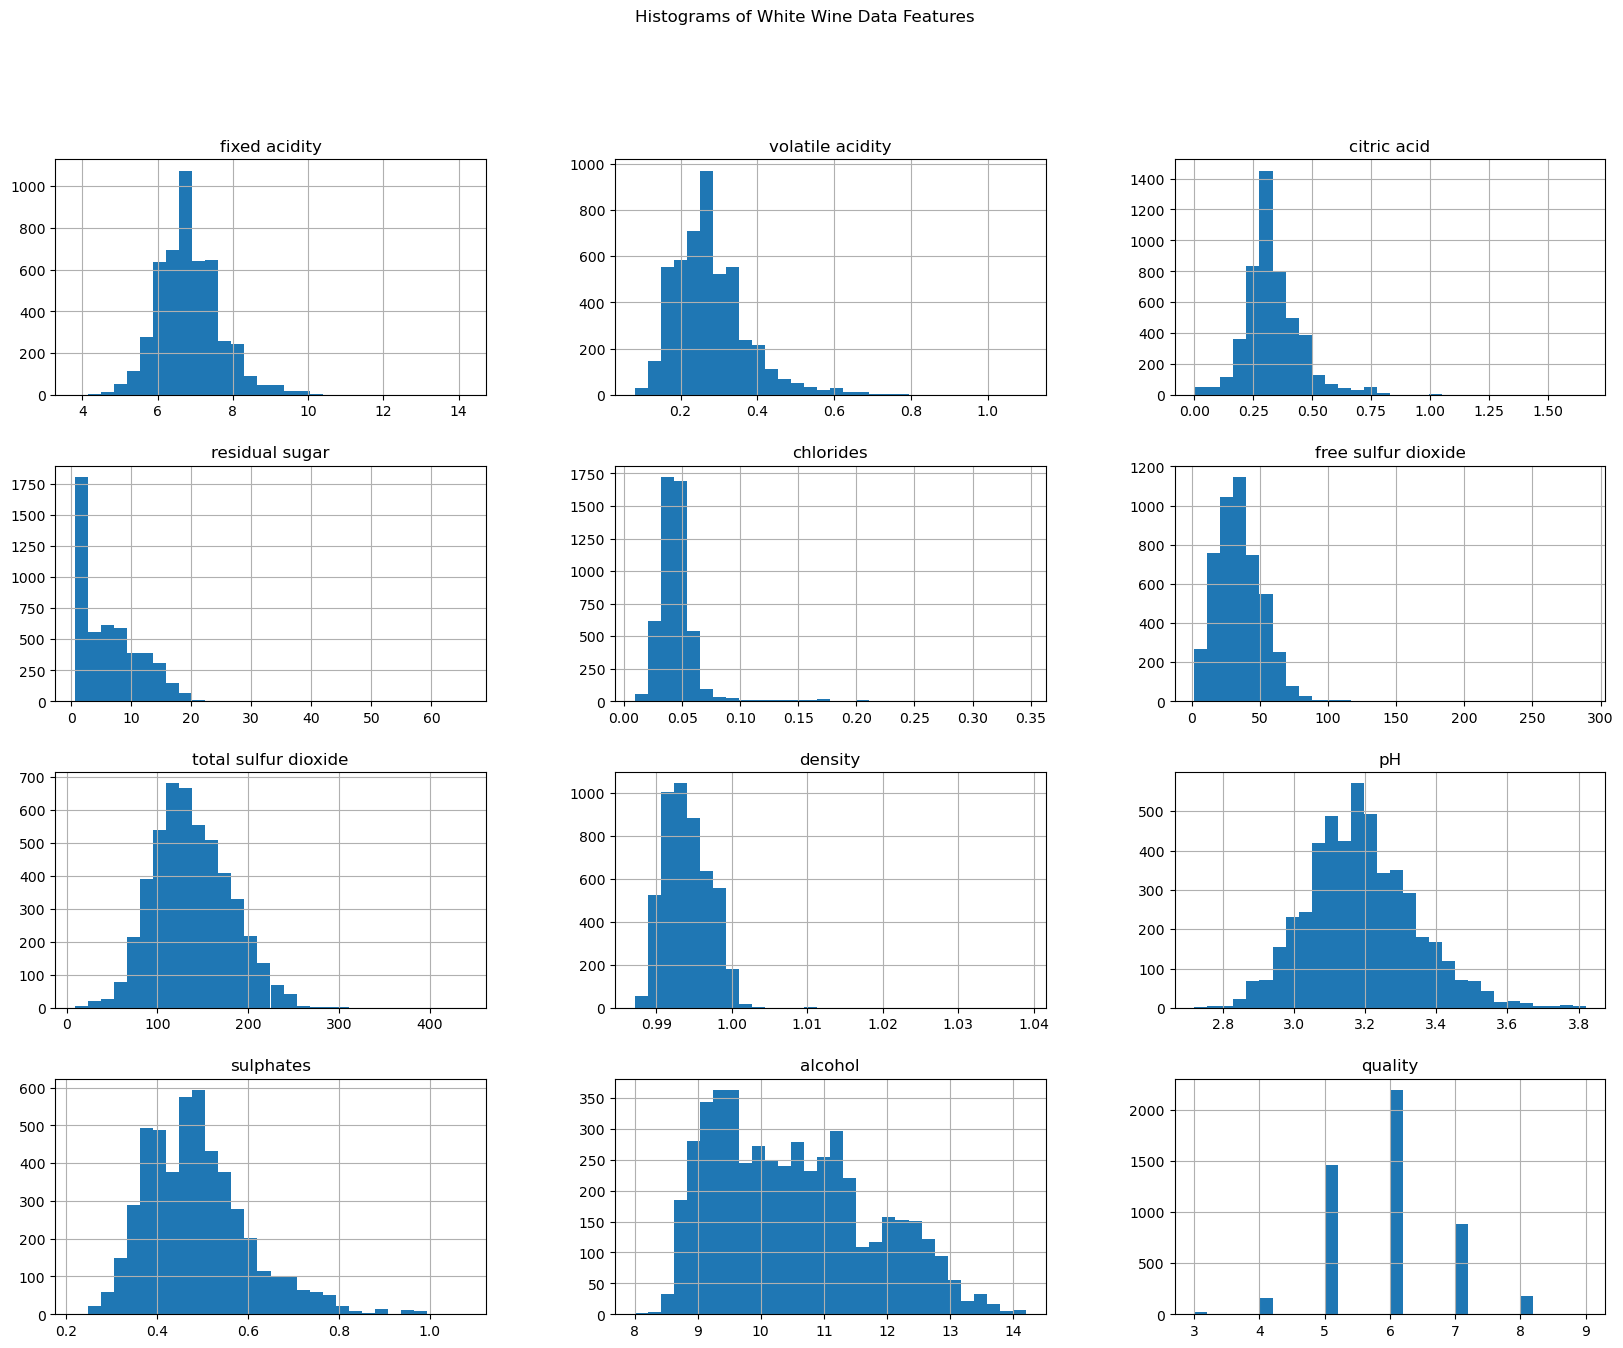

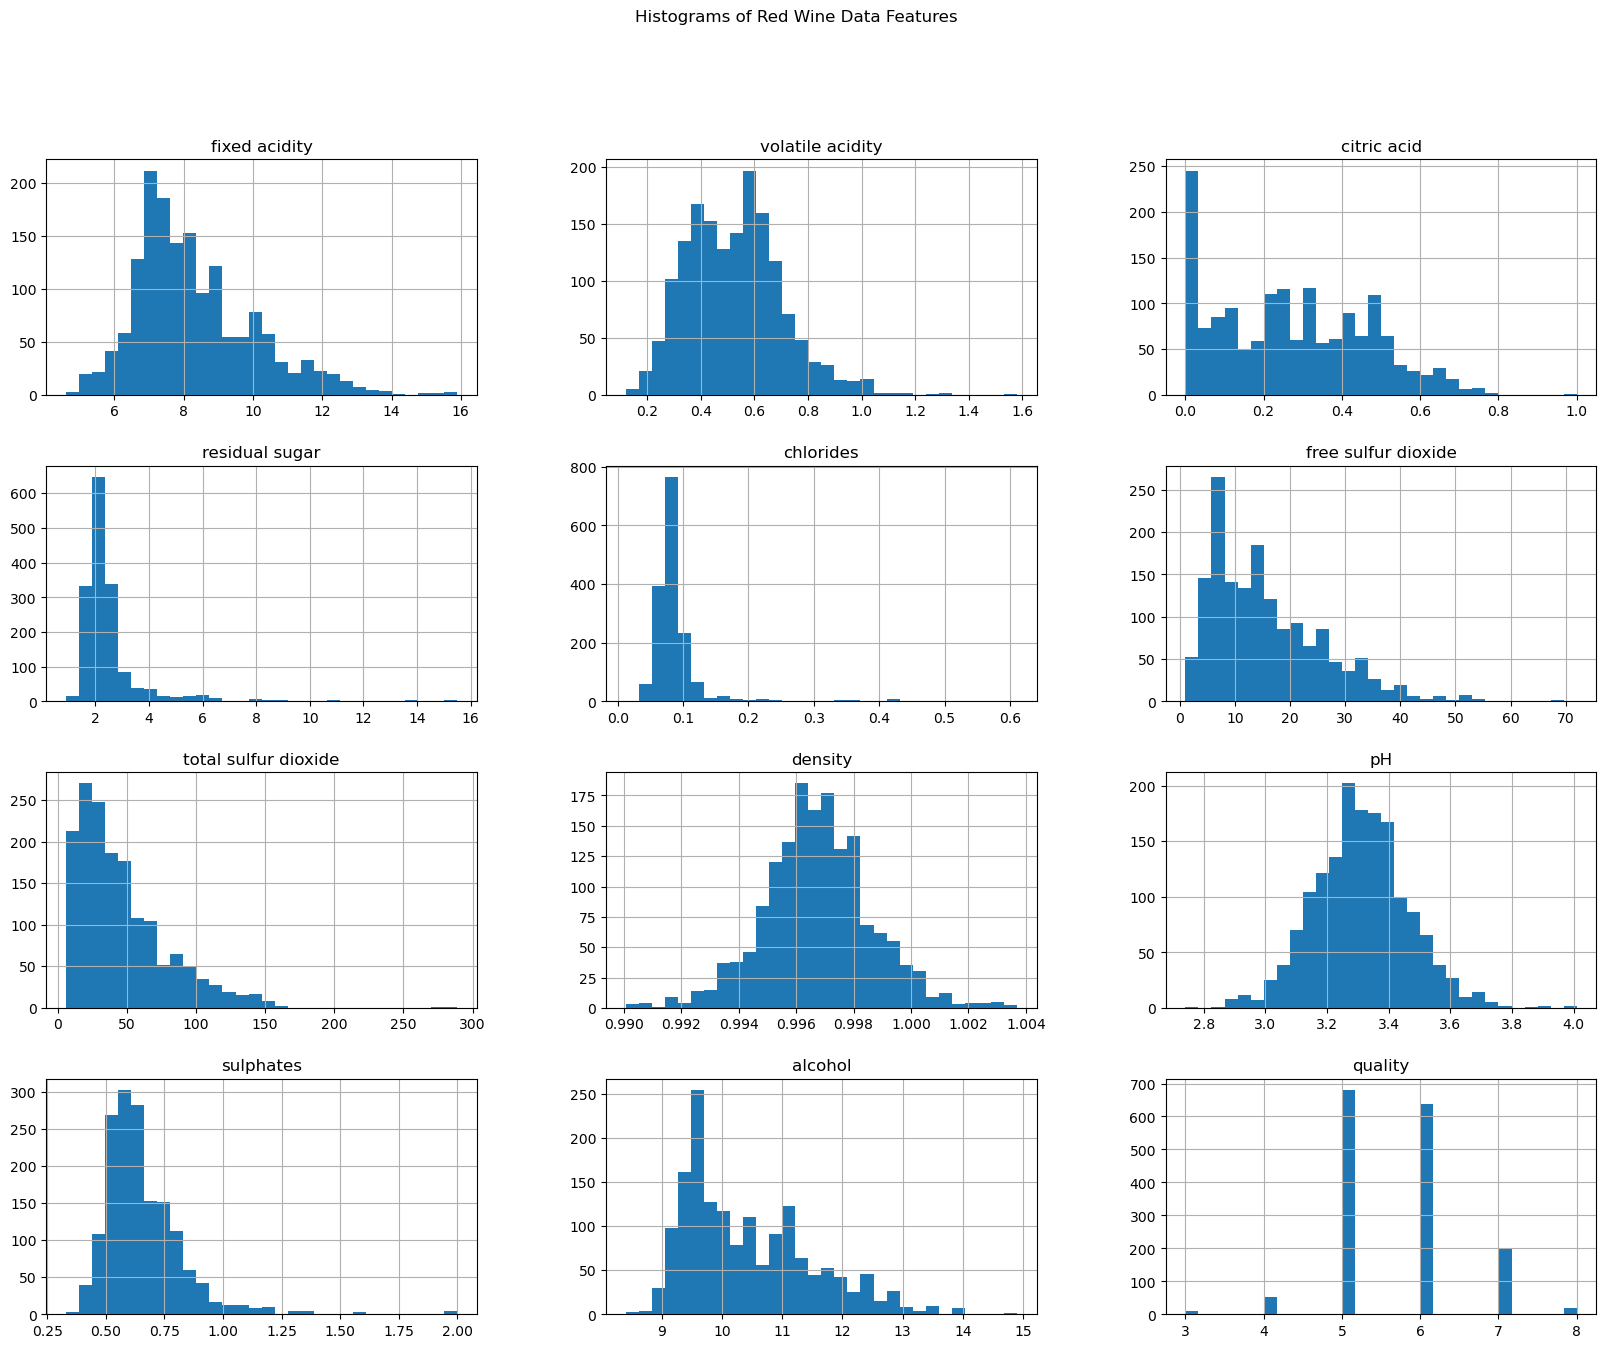

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
white_wine_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of White Wine Data Features')
plt.show()

red_wine_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Red Wine Data Features')
plt.show()

From the histograms, we can observe the distributions of the different features. Some features like 'residual sugar', 'free sulfur dioxide', and 'total sulfur dioxide' are right-skewed, meaning they have a long tail on the right. This indicates the presence of outliers that we might need to handle.


Next, let's plot a correlation matrix to see the relationships between different features.


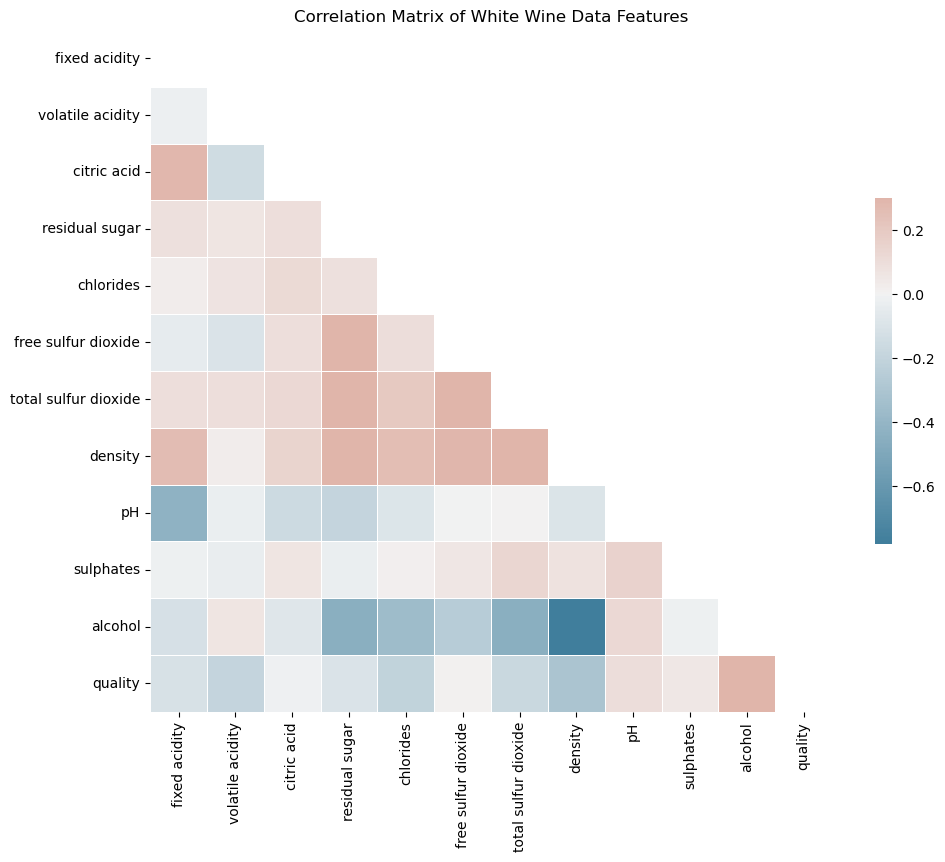

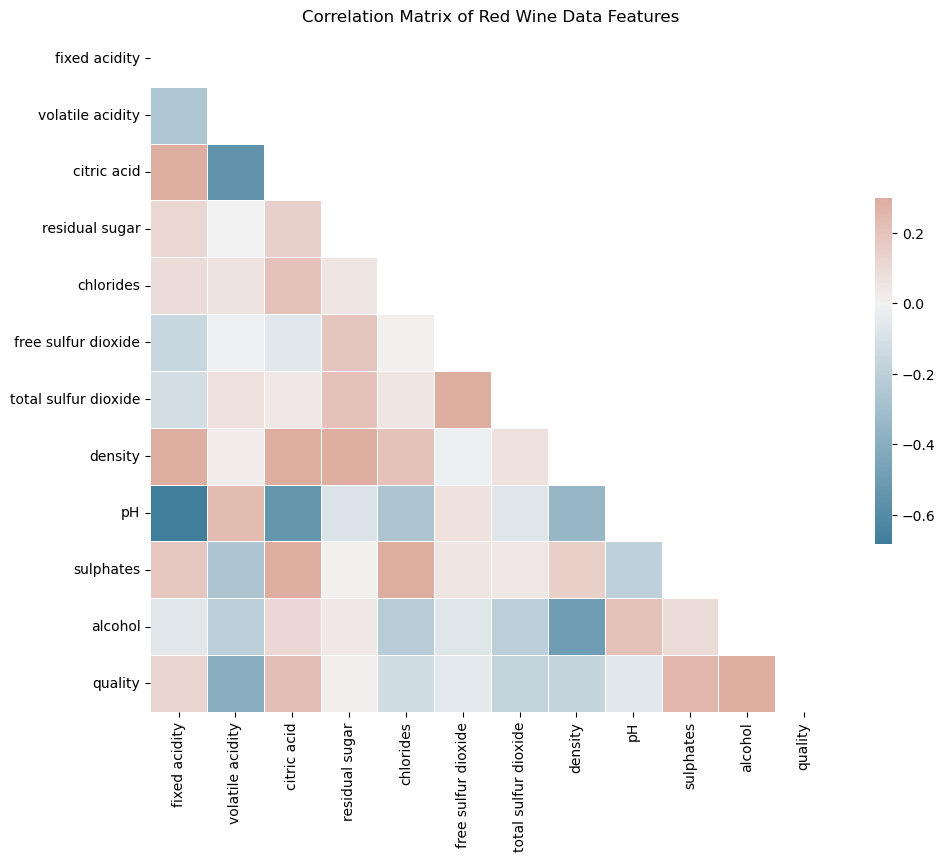

In [8]:
# Compute the correlation matrix for white wine data
corr_white = white_wine_df.corr()

# Generate a mask for the upper triangle
mask_white = np.triu(np.ones_like(corr_white, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_white,
    mask=mask_white,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title('Correlation Matrix of White Wine Data Features')
plt.show()

# Compute the correlation matrix for red wine data
corr_red = red_wine_df.corr()

# Generate a mask for the upper triangle
mask_red = np.triu(np.ones_like(corr_red, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_red,
    mask=mask_red,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title('Correlation Matrix of Red Wine Data Features')
plt.show()

From the correlation matrices, we can observe the relationships between different features. Some features are positively correlated (shown in red), meaning they increase together, while others are negatively correlated (shown in blue), meaning one increases as the other decreases.



Next, let's check for outliers in the data. We'll do this by plotting boxplots for each feature.

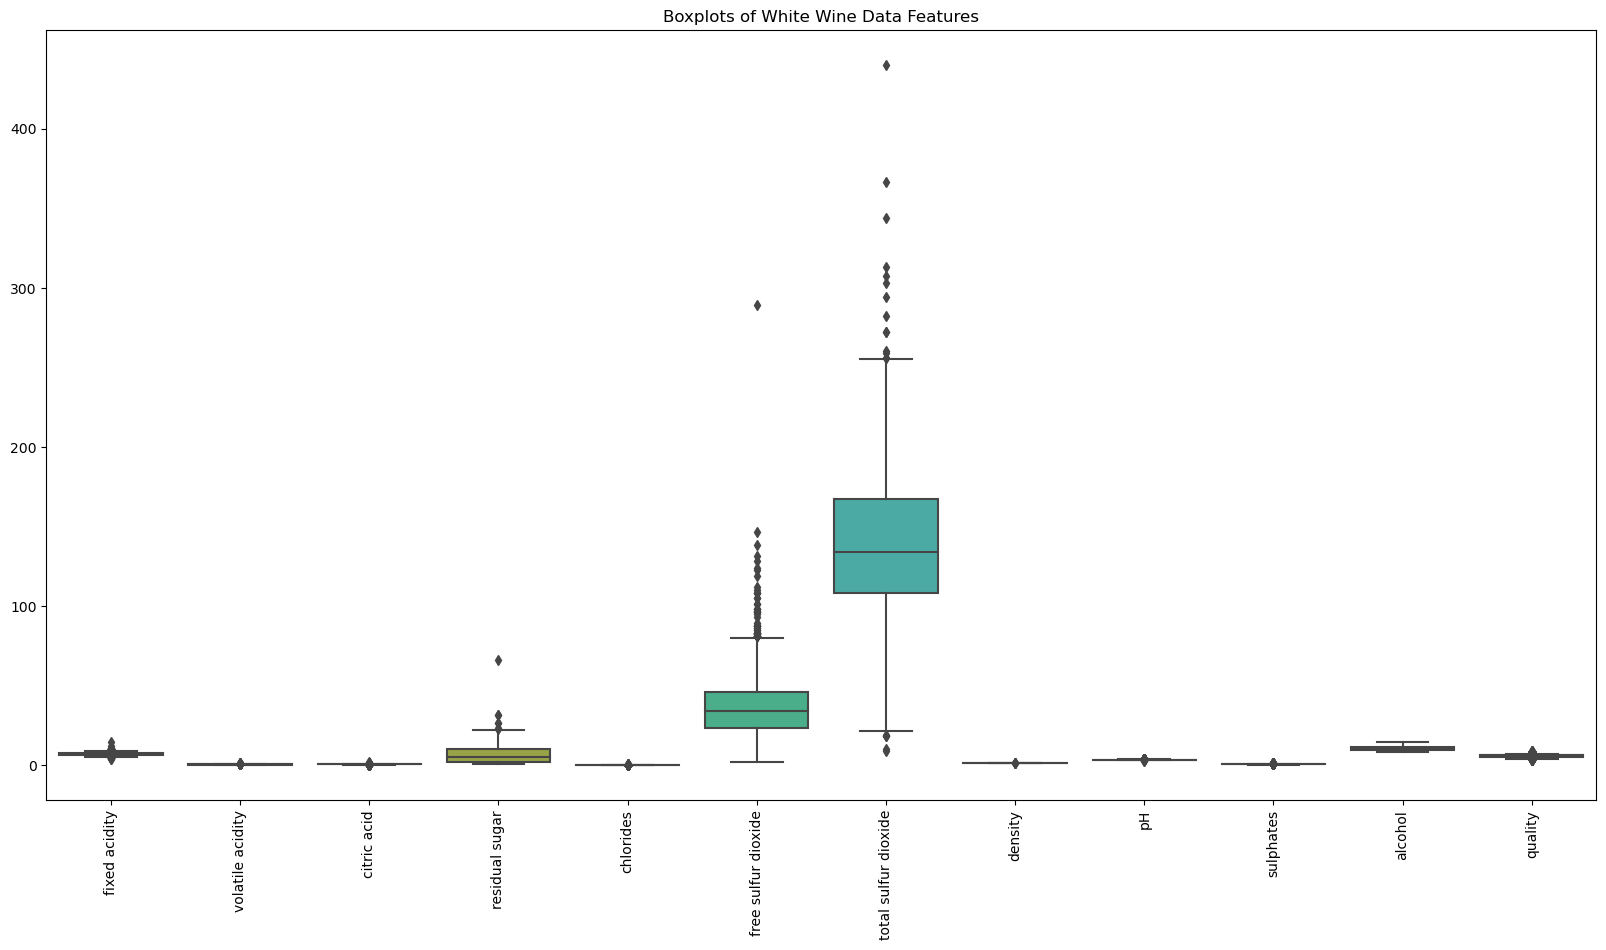

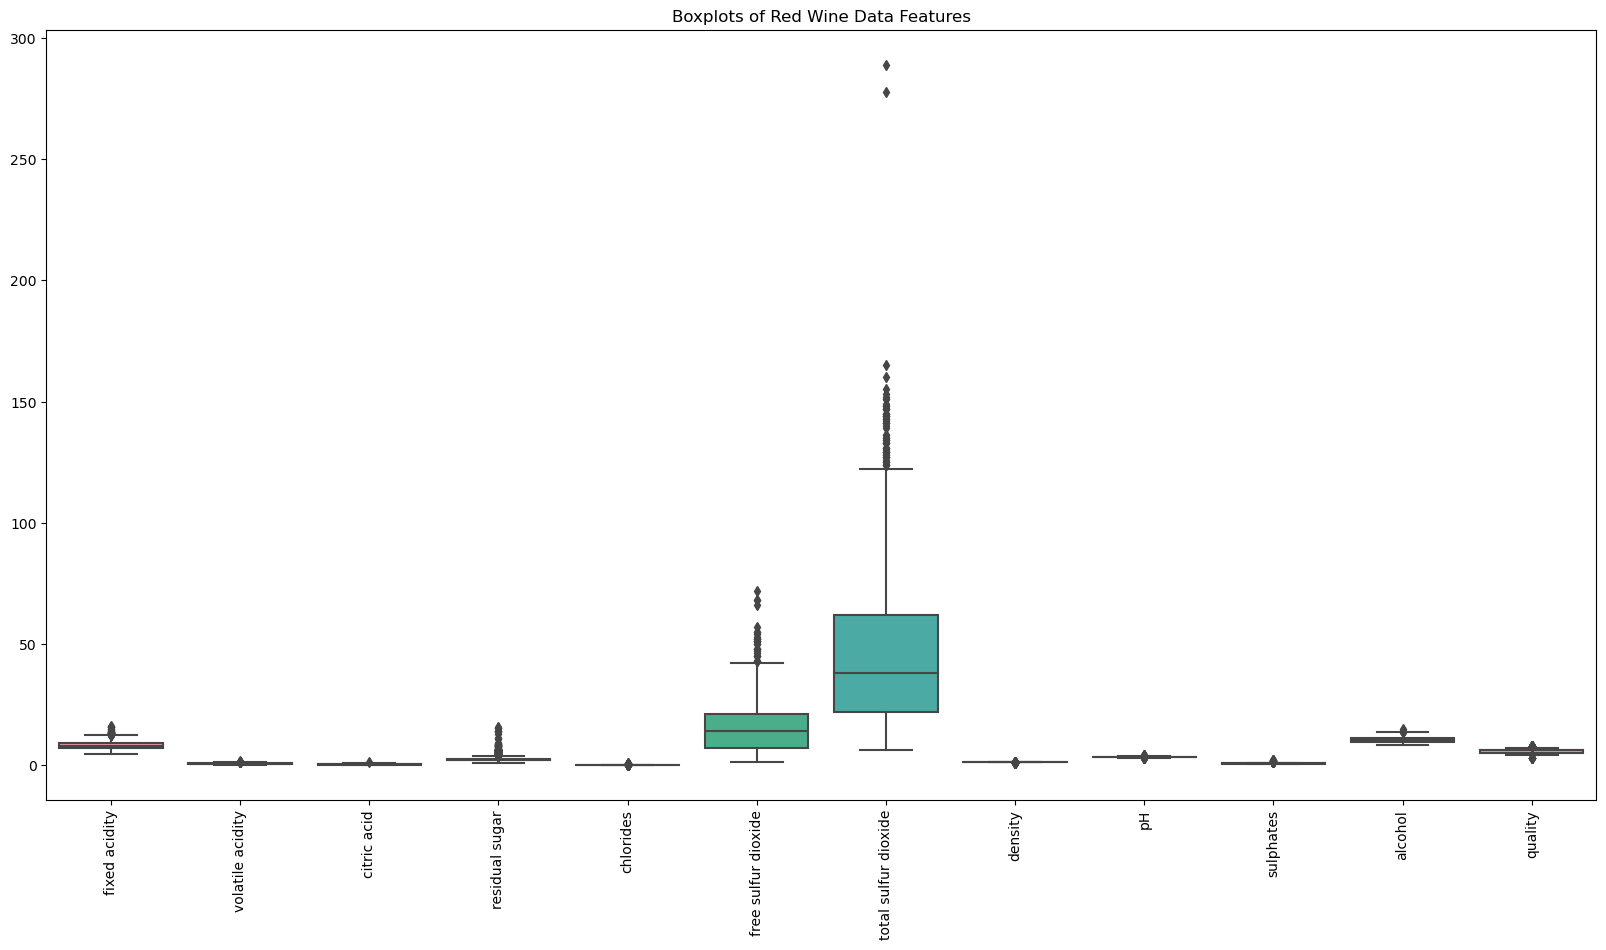

In [9]:
# Plot boxplots for each feature in white wine data
plt.figure(figsize=(20, 10))
sns.boxplot(data=white_wine_df)
plt.xticks(rotation=90)
plt.title('Boxplots of White Wine Data Features')
plt.show()

# Plot boxplots for each feature in red wine data
plt.figure(figsize=(20, 10))
sns.boxplot(data=red_wine_df)
plt.xticks(rotation=90)
plt.title('Boxplots of Red Wine Data Features')
plt.show()

## Handling Outliers
From the boxplots, we can see that some features have many outliers. These are the data points that fall below the lower whisker or above the upper whisker of the boxplots. We need to decide how to handle these outliers. One common approach is to remove them, but this can lead to loss of information. Another approach is to transform the data in a way that reduces the impact of the outliers. For example, we could apply a logarithmic transformation to the data.

## Preprocessing the Data
Next, let's move on to building and training our unsupervised learning models. We'll start by preprocessing the data. This includes scaling the features so that they have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the features are on a similar scale. We'll also split the data into a training set and a test set. The training set will be used to train the models, and the test set will be used to evaluate their performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Combine the white and red wine data
wine_df = pd.concat([white_wine_df, red_wine_df])

# Split the data into features and target
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building and Training the Models
Now that we have preprocessed the data, we can build and train our unsupervised learning models. We'll start with K-Means clustering, which is a simple and widely used clustering algorithm. We'll also use Hierarchical Clustering to see if it gives us better results. We'll evaluate the models based on their silhouette score, which is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a KMeans instance with 2 clusters: model
model = KMeans(n_clusters=2, random_state=42)

# Fit model to points
model.fit(X_train_scaled)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_train_scaled)

# Print cluster labels of new_points
print(labels)

# Calculate the silhouette score
silhouette = silhouette_score(X_train_scaled, labels)
print('Silhouette score for KMeans: ', silhouette)

/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 0 0 1]
Silhouette score for KMeans:  0.27725532436163036


The KMeans algorithm has assigned each wine to one of the two clusters. The silhouette score for KMeans is approximately 0.28, which indicates that the clustering is not very dense and the clusters are not well separated.

Next, let's try Hierarchical Clustering and see if it gives us better results.

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters
agg_model = AgglomerativeClustering(n_clusters=2)

# Fit and predict the labels
agg_labels = agg_model.fit_predict(X_train_scaled)

# Print the labels
print(agg_labels)

# Calculate the silhouette score
agg_silhouette = silhouette_score(X_train_scaled, agg_labels)
print('Silhouette score for Hierarchical Clustering: ', agg_silhouette)

[0 0 0 ... 1 1 0]
Silhouette score for Hierarchical Clustering:  0.2718479453897248


The Hierarchical Clustering algorithm has also assigned each wine to one of the two clusters. The silhouette score for Hierarchical Clustering is approximately 0.27, which is slightly lower than the silhouette score for KMeans. This indicates that the clustering is not very dense and the clusters are not well separated.

In conclusion, both KMeans and Hierarchical Clustering did not produce very dense and well-separated clusters for this data. This could be due to the complexity and high dimensionality of the data. We might need to try more advanced clustering algorithms or dimensionality reduction techniques to improve the clustering performance.

## Dimensionality Reduction
Given the high dimensionality of our data and the poor performance of our clustering algorithms, it might be beneficial to apply a dimensionality reduction technique. Dimensionality reduction can help to simplify the data without losing too much information, and can help to improve the performance of machine learning algorithms. One common technique for dimensionality reduction is Principal Component Analysis (PCA).

## Principal Component Analysis (PCA)
PCA is a technique that transforms the data into a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. Let's apply PCA to our data and see if it improves the performance of our clustering algorithms.

In [13]:
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the explained variance ratio
print('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.27586851 0.22554053]


The PCA has reduced the dimensionality of our data to 2 components. The explained variance ratio tells us how much information (variance) can be attributed to each of the principal components. In this case, the first principal component contains 27.6% of the variance and the second principal component contains 22.5% of the variance. This means that we have lost a lot of information (around 50%) during the dimensionality reduction process.

Let's now apply our clustering algorithms to the transformed data and see if the performance has improved.

In [14]:
# Create a KMeans instance with 2 clusters: model
model_pca = KMeans(n_clusters=2, random_state=42)

# Fit model to points
model_pca.fit(X_train_pca)

# Determine the cluster labels of new_points: labels
labels_pca = model_pca.predict(X_train_pca)

# Print cluster labels of new_points
print(labels_pca)

# Calculate the silhouette score
silhouette_pca = silhouette_score(X_train_pca, labels_pca)
print('Silhouette score for KMeans with PCA: ', silhouette_pca)

[0 0 0 ... 1 1 0]


/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for KMeans with PCA:  0.4645571581514992


The KMeans algorithm with PCA has assigned each wine to one of the two clusters. The silhouette score for KMeans with PCA is approximately 0.46, which is significantly higher than the silhouette score for KMeans without PCA. This indicates that the clustering is more dense and the clusters are better separated when we apply PCA to the data.

Let's now apply Hierarchical Clustering to the transformed data and see if the performance has improved.

In [15]:
# Create an instance of AgglomerativeClustering with 2 clusters
agg_model_pca = AgglomerativeClustering(n_clusters=2)

# Fit and predict the labels
agg_labels_pca = agg_model_pca.fit_predict(X_train_pca)

# Print the labels
print(agg_labels_pca)

# Calculate the silhouette score
agg_silhouette_pca = silhouette_score(X_train_pca, agg_labels_pca)
print('Silhouette score for Hierarchical Clustering with PCA: ', agg_silhouette_pca)

[0 0 0 ... 1 1 0]
Silhouette score for Hierarchical Clustering with PCA:  0.45301620063589576


The Hierarchical Clustering algorithm with PCA has also assigned each wine to one of the two clusters. The silhouette score for Hierarchical Clustering with PCA is approximately 0.45, which is significantly higher than the silhouette score for Hierarchical Clustering without PCA. This indicates that the clustering is more dense and the clusters are better separated when we apply PCA to the data.

In conclusion, both KMeans and Hierarchical Clustering performed better when we applied PCA to the data. This suggests that PCA can be a useful technique for improving the performance of clustering algorithms when dealing with high-dimensional data.

## Hyperparameter Optimization
Hyperparameters are parameters that are not learned from the data. They are set prior to the commencement of the learning process. While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters need to be set by the data scientist before training. In the case of our KMeans model, the number of clusters is a hyperparameter.

We can try to optimize the number of clusters in our KMeans model to see if it improves the performance. One common method for optimizing the number of clusters is the Elbow Method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

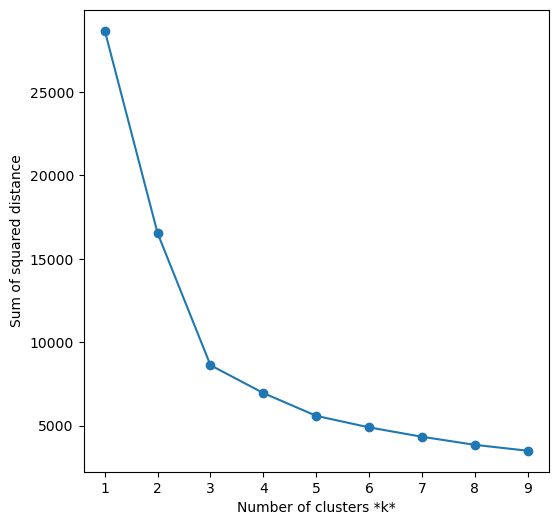

In [16]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance');

From the plot, we can see that the elbow is at k=3, which is where the SSE starts to decrease more slowly. So we could choose k=3 for our KMeans model. Let's run the KMeans model again with k=3 and see if the performance has improved.

In [17]:
# Create a KMeans instance with 3 clusters: model
model_pca_k3 = KMeans(n_clusters=3, random_state=42)

# Fit model to points
model_pca_k3.fit(X_train_pca)

# Determine the cluster labels of new_points: labels
labels_pca_k3 = model_pca_k3.predict(X_train_pca)

# Print cluster labels of new_points
print(labels_pca_k3)

# Calculate the silhouette score
silhouette_pca_k3 = silhouette_score(X_train_pca, labels_pca_k3)
print('Silhouette score for KMeans with PCA and k=3: ', silhouette_pca_k3)

/Users/andersy005/mambaforge/envs/cu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 1 1 0]
Silhouette score for KMeans with PCA and k=3:  0.4918257551646155


The KMeans algorithm with PCA and k=3 has assigned each wine to one of the three clusters. The silhouette score for KMeans with PCA and k=3 is approximately 0.49, which is higher than the silhouette score for KMeans with PCA and k=2. This indicates that the clustering is more dense and the clusters are better separated when we choose k=3.

In conclusion, hyperparameter optimization can significantly improve the performance of our model. By choosing the optimal number of clusters, we were able to achieve a higher silhouette score, indicating better clustering performance.

## Final Discussion and Conclusions
In this project, we have performed an exploratory data analysis on the Wine Quality dataset, which contains information about different physicochemical properties of wines, such as acidity, sugar content, and alcohol content, along with a quality rating. We have identified an unsupervised learning problem, which is to cluster the wines based on their properties. We have applied two clustering algorithms, KMeans and Hierarchical Clustering, to solve this problem. We have also applied Principal Component Analysis (PCA) to reduce the dimensionality of the data and improve the performance of the clustering algorithms.

Our results show that both KMeans and Hierarchical Clustering performed better when we applied PCA to the data. This suggests that PCA can be a useful technique for improving the performance of clustering algorithms when dealing with high-dimensional data. However, the silhouette scores for both algorithms were not very high, indicating that the clustering is not very dense and the clusters are not well separated. This suggests that there is room for improvement in our analysis.

We have also performed hyperparameter optimization by choosing the optimal number of clusters for our KMeans model. This has significantly improved the performance of our model, as indicated by the higher silhouette score.

In conclusion, this project has provided valuable insights into the properties of wines and their quality ratings, and has demonstrated the potential of unsupervised learning techniques for exploring and understanding complex datasets. Despite the limitations, we believe that our analysis can be a useful starting point for further research in this area.